In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
dir_path = "C:/Users/iris168/DATA_MERGE_NEW_rename/"
img = cv2.imread(dir_path+'cells (1).jpg')
data= [np.array(img[:,:,0].reshape(-1),dtype = 'float32')]
for i in range (2,1044):
    cell_img2_ = cv2.imread(dir_path+'cells ('+str(i)+').jpg')
    if (cell_img2_.shape == (50,50,3)):
        img2= np.array(cell_img2_[:,:,0].reshape(-1),dtype = 'float32')
        data_ = np.append(data, [img2], axis=0 )
        data = data_
    print(data.shape)

(2, 2500)
(3, 2500)
(4, 2500)
(5, 2500)
(6, 2500)
(7, 2500)
(8, 2500)
(9, 2500)
(10, 2500)
(11, 2500)
(12, 2500)
(13, 2500)
(14, 2500)
(15, 2500)
(16, 2500)
(16, 2500)
(17, 2500)
(18, 2500)
(19, 2500)
(20, 2500)
(21, 2500)
(22, 2500)
(23, 2500)
(24, 2500)
(25, 2500)
(26, 2500)
(27, 2500)
(28, 2500)
(28, 2500)
(29, 2500)
(30, 2500)
(31, 2500)
(32, 2500)
(33, 2500)
(34, 2500)
(35, 2500)
(36, 2500)
(37, 2500)
(38, 2500)
(39, 2500)
(40, 2500)
(41, 2500)
(42, 2500)
(43, 2500)
(44, 2500)
(45, 2500)
(46, 2500)
(47, 2500)
(48, 2500)
(49, 2500)
(50, 2500)
(51, 2500)
(52, 2500)
(53, 2500)
(54, 2500)
(55, 2500)
(56, 2500)
(57, 2500)
(58, 2500)
(59, 2500)
(60, 2500)
(61, 2500)
(62, 2500)
(63, 2500)
(64, 2500)
(65, 2500)
(66, 2500)
(67, 2500)
(68, 2500)
(69, 2500)
(70, 2500)
(71, 2500)
(72, 2500)
(73, 2500)
(74, 2500)
(75, 2500)
(76, 2500)
(77, 2500)
(78, 2500)
(79, 2500)
(80, 2500)
(81, 2500)
(82, 2500)
(82, 2500)
(83, 2500)
(84, 2500)
(85, 2500)
(86, 2500)
(87, 2500)
(88, 2500)
(89, 2500)
(90, 25

(695, 2500)
(696, 2500)
(697, 2500)
(698, 2500)
(699, 2500)
(700, 2500)
(701, 2500)
(702, 2500)
(703, 2500)
(704, 2500)
(705, 2500)
(706, 2500)
(707, 2500)
(708, 2500)
(709, 2500)
(710, 2500)
(711, 2500)
(712, 2500)
(713, 2500)
(714, 2500)
(715, 2500)
(716, 2500)
(717, 2500)
(718, 2500)
(719, 2500)
(720, 2500)
(721, 2500)
(722, 2500)
(723, 2500)
(724, 2500)
(724, 2500)
(725, 2500)
(726, 2500)
(727, 2500)
(728, 2500)
(729, 2500)
(730, 2500)
(731, 2500)
(732, 2500)
(733, 2500)
(734, 2500)
(735, 2500)
(736, 2500)
(737, 2500)
(738, 2500)
(739, 2500)
(740, 2500)
(741, 2500)
(742, 2500)
(743, 2500)
(744, 2500)
(745, 2500)
(746, 2500)
(747, 2500)
(748, 2500)
(749, 2500)
(750, 2500)
(751, 2500)
(752, 2500)
(753, 2500)
(754, 2500)
(755, 2500)
(756, 2500)
(757, 2500)
(758, 2500)
(759, 2500)
(760, 2500)
(761, 2500)
(762, 2500)
(763, 2500)
(764, 2500)
(765, 2500)
(766, 2500)
(767, 2500)
(767, 2500)
(768, 2500)
(769, 2500)
(770, 2500)
(771, 2500)
(772, 2500)
(773, 2500)
(774, 2500)
(775, 2500)
(776

AttributeError: 'NoneType' object has no attribute 'shape'

In [3]:
def rand_batch(data,batch_size):
    np.random.shuffle(data)
    return data[0:batch_size]

In [4]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding = 'SAME')

def deconv2d(x, W, output_shape):
    return tf.nn.conv2d_transpose(x, W, output_shape, strides = [1, 2, 2, 1], padding = 'SAME')
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

In [5]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape = [None, 2500])
x_origin = tf.reshape(x, [-1, 50, 50, 1])

W_e_conv1 = weight_variable([5, 5, 1, 16], "w_e_conv1")
b_e_conv1 = bias_variable([16], "b_e_conv1")
h_e_conv1 = tf.nn.relu(tf.add(conv2d(x_origin, W_e_conv1), b_e_conv1))

W_e_conv2 = weight_variable([5, 5, 16, 32], "w_e_conv2")
b_e_conv2 = bias_variable([32], "b_e_conv2")
h_e_conv2 = tf.nn.relu(tf.add(conv2d(h_e_conv1, W_e_conv2), b_e_conv2))

W_e_conv3 = weight_variable([5, 5, 32, 64], "w_e_conv3")
b_e_conv3 = bias_variable([64], "b_e_conv3")
h_e_conv3 = tf.nn.relu(tf.add(conv2d(h_e_conv2, W_e_conv3), b_e_conv3))

code_layer = h_e_conv2

W_d_conv0 = weight_variable([5, 5, 16, 64], "W_d_conv0")
b_d_conv0 = bias_variable([1], "b_d_conv0")
output_shape_d_conv0 = tf.stack([tf.shape(x)[0], 13, 13, 32])
h_d_conv0 = tf.nn.relu(deconv2d(h_e_conv3, W_d_conv0, output_shape_d_conv0))

W_d_conv1 = weight_variable([5, 5, 16, 32], "w_d_conv1")
b_d_conv1 = bias_variable([1], "b_d_conv1")
output_shape_d_conv1 = tf.stack([tf.shape(x)[0], 25, 25, 16])
h_d_conv1 = tf.nn.relu(deconv2d(h_e_conv2, W_d_conv1, output_shape_d_conv1))

W_d_conv2 = weight_variable([5, 5, 1, 16], "w_d_conv2")
b_d_conv2 = bias_variable([16], "b_d_conv2")
output_shape_d_conv2 = tf.stack([tf.shape(x)[0], 50, 50, 1])
h_d_conv2 = tf.nn.relu(deconv2d(h_d_conv1, W_d_conv2, output_shape_d_conv2))

x_reconstruct = h_d_conv2
print("reconstruct layer shape : %s" % x_reconstruct.get_shape())

Instructions for updating:
Colocations handled automatically by placer.
reconstruct layer shape : (?, 50, 50, 1)


In [6]:
print("x_origin",x_origin)
print("W_e_conv1",W_e_conv1)
print("h_e_conv1",h_e_conv1)
print("W_e_conv2",W_e_conv2)
print("h_e_conv2",h_e_conv2)
print("W_e_conv2",W_e_conv3)
print("h_e_conv2",h_e_conv3)
print("code layer shape : %s" % h_e_conv2.get_shape())
print("W_d_conv0",W_d_conv0)
print("h_d_conv0",h_d_conv0)
print("W_d_conv1",W_d_conv1)
print("h_d_conv1",h_d_conv1)
print("W_d_conv2",W_d_conv2)
print("h_d_conv2",h_d_conv2)

x_origin Tensor("Reshape:0", shape=(?, 50, 50, 1), dtype=float32)
W_e_conv1 <tf.Variable 'Variable:0' shape=(5, 5, 1, 16) dtype=float32_ref>
h_e_conv1 Tensor("Relu:0", shape=(?, 25, 25, 16), dtype=float32)
W_e_conv2 <tf.Variable 'Variable_2:0' shape=(5, 5, 16, 32) dtype=float32_ref>
h_e_conv2 Tensor("Relu_1:0", shape=(?, 13, 13, 32), dtype=float32)
W_e_conv2 <tf.Variable 'Variable_4:0' shape=(5, 5, 32, 64) dtype=float32_ref>
h_e_conv2 Tensor("Relu_2:0", shape=(?, 7, 7, 64), dtype=float32)
code layer shape : (?, 13, 13, 32)
W_d_conv0 <tf.Variable 'Variable_6:0' shape=(5, 5, 16, 64) dtype=float32_ref>
h_d_conv0 Tensor("Relu_3:0", shape=(?, 13, 13, 32), dtype=float32)
W_d_conv1 <tf.Variable 'Variable_8:0' shape=(5, 5, 16, 32) dtype=float32_ref>
h_d_conv1 Tensor("Relu_4:0", shape=(?, 25, 25, 16), dtype=float32)
W_d_conv2 <tf.Variable 'Variable_10:0' shape=(5, 5, 1, 16) dtype=float32_ref>
h_d_conv2 Tensor("Relu_5:0", shape=(?, 50, 50, 1), dtype=float32)


In [7]:
w_list = [W_e_conv1,W_e_conv2,W_d_conv1,W_d_conv2]
org_loss = tf.reduce_mean(tf.pow(x_reconstruct - x_origin, 2))
regularizer = tf.reduce_sum([tf.reduce_sum(
                             tf.pow(w,2)/(1+tf.pow(w,2))) for w in w_list]) \
                            /tf.reduce_sum(
                             [tf.size(w,out_type=tf.float32) for w in w_list])
loss = org_loss+regularizer
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(loss)
init_op = tf.global_variables_initializer()

In [8]:
train_loss =[]
batch_size =30
sess = tf.InteractiveSession()
sess.run(init_op)
for i in range(10000):
    batch = rand_batch(data,batch_size)
    if i%100 == 0:
        print("step %d, loss %g"%(i, loss.eval(feed_dict={x:batch/255})))
        train_loss.append(loss.eval(feed_dict={x:batch}))
    optimizer.run(feed_dict={x:batch/255})
    
print("final loss %g" % loss.eval(feed_dict={x:data/255}))

step 0, loss 0.289685
step 100, loss 0.15061
step 200, loss 0.0590575
step 300, loss 0.00985195
step 400, loss 0.00795905
step 500, loss 0.00897278
step 600, loss 0.0130765
step 700, loss 0.0115308
step 800, loss 0.0140551
step 900, loss 0.0160735
step 1000, loss 0.00834765
step 1100, loss 0.012288
step 1200, loss 0.0177309
step 1300, loss 0.0087593
step 1400, loss 0.0100066
step 1500, loss 0.00959975
step 1600, loss 0.0123078
step 1700, loss 0.0135963
step 1800, loss 0.0117724
step 1900, loss 0.0129595
step 2000, loss 0.0105636
step 2100, loss 0.00811876
step 2200, loss 0.0101568
step 2300, loss 0.0101946
step 2400, loss 0.00658524
step 2500, loss 0.0105981
step 2600, loss 0.0098072
step 2700, loss 0.00768013
step 2800, loss 0.00858605
step 2900, loss 0.00882988
step 3000, loss 0.00410297
step 3100, loss 0.0070469
step 3200, loss 0.00724112
step 3300, loss 0.00710866
step 3400, loss 0.00807661
step 3500, loss 0.00730686
step 3600, loss 0.00612288
step 3700, loss 0.00647293
step 3800, 

NameError: name 'data_test' is not defined

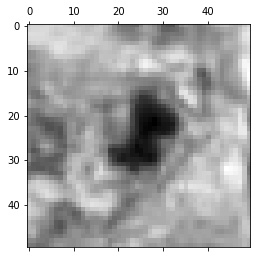

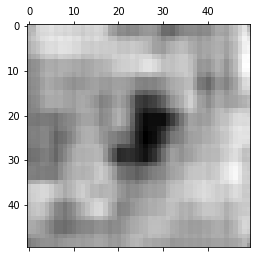

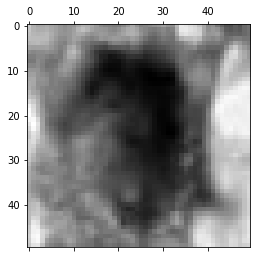

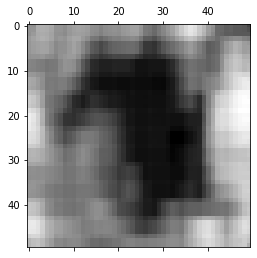

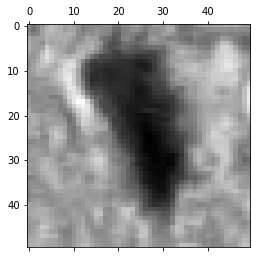

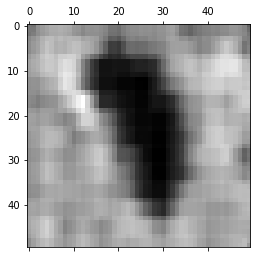

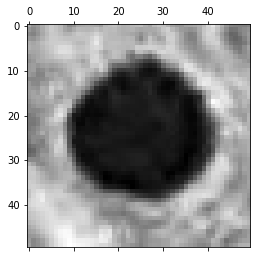

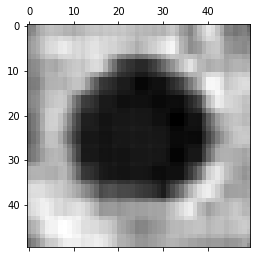

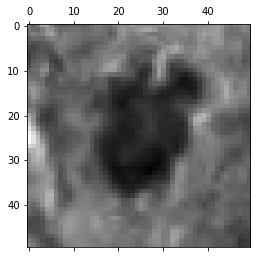

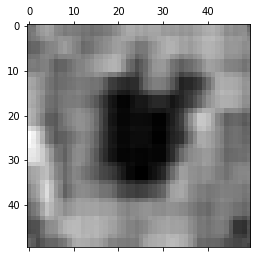

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = x_reconstruct.eval(feed_dict = {x:data[100:200]/255})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data[i+100, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:]*255, (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))

In [14]:
import math
def plot_conv_layer(layer, image, num_filters):
    output = sess.run(layer, feed_dict = {x: [image]})
    
    num_grids = int(math.ceil(math.sqrt(num_filters)))
    
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i < num_grids * num_grids:
            img = output[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

IndexError: index 32 is out of bounds for axis 3 with size 32

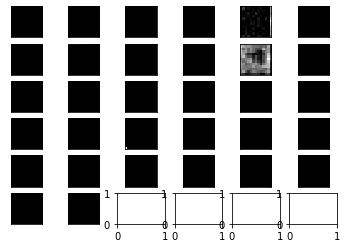

In [15]:
num_filters = 32
plot_conv_layer(code_layer, data[0], num_filters)

In [16]:
code = sess.run(code_layer, feed_dict={x:data})

In [17]:
code = code.reshape(-1,5408)

In [18]:
code.shape

(1000, 5408)

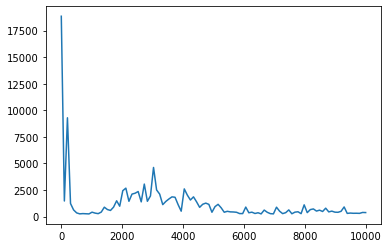

In [20]:
x = np.linspace(0,10000,100)
plt.plot(x,train_loss)

In [21]:
Score=np.loadtxt("C:/Users/iris168/DATA_MERGE_NEW_rename/Score.txt")

In [23]:
labels = [0]
dir_path = "C:/Users/iris168/DATA_MERGE_NEW_rename/"
for i in range (2,1043):
    cell_img2_ = cv2.imread(dir_path+'cells ('+str(i)+').jpg')
    if (cell_img2_.shape == (50,50,3)):
        if (Score[:,2][i-1] < Score[:,2].min()+35):
            labels.append(0)
        elif (Score[:,2][i-1] > Score[:,2].max()-35):
            labels.append(1)
        else:
            labels.append(2)

In [24]:
len(labels)

1000

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [27]:
def plot_scatter(x, labels, title, txt = False):
    plt.title(title)
    ax = plt.subplot()
    ax.scatter(x[:,0], x[:,1], c = labels)
    txts = []
    if txt:
        for i in range(10):
            xtext, ytext = np.median(x[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)
    plt.show()

In [28]:
def pca(X, n_components):
    pca = PCA(n_components = n_components)
    pca.fit(X)
    return pca.transform(X)

In [29]:
def tsne(X, n_components):
    model = TSNE(n_components=2, perplexity=40)
    return model.fit_transform(X)

In [31]:
test_layer3_pca = pca(code, 2)

C:\Users\iris168\.conda\envs\tensorflow_new\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


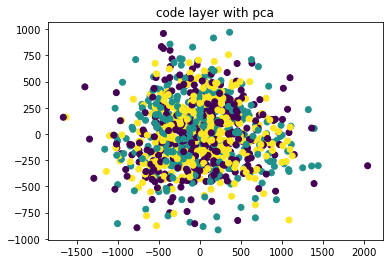

In [33]:
plot_scatter(test_layer3_pca, labels, "code layer with pca")

C:\Users\iris168\.conda\envs\tensorflow_new\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


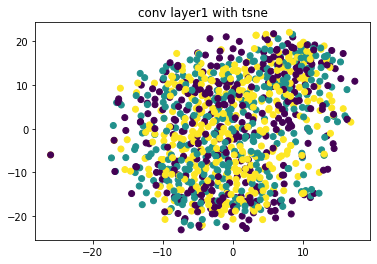

In [34]:
layer1_pca = pca(code, 50)
layer1_tsne = tsne(layer1_pca, 2)
plot_scatter(layer1_tsne, labels, "conv layer1 with tsne")

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

In [36]:
def plot_train(bdt_discrete,bdt_real):
    n_trees_discrete = len(bdt_discrete)
    n_trees_real = len(bdt_real)

    # Boosting might terminate early, but the following arrays are always
    # n_estimators long. We crop them to the actual number of trees here:
    discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
    real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
    discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(range(1, n_trees_discrete + 1),
             discrete_test_errors, c='black', label='SAMME')
    plt.plot(range(1, n_trees_real + 1),
             real_test_errors, c='black',
             linestyle='dashed', label='SAMME.R')
    plt.legend()
    plt.ylim(0.18, 0.62)
    plt.ylabel('Test Error')
    plt.xlabel('Number of Trees')

    plt.subplot(132)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
             "b", label='SAMME', alpha=.5)
    plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
             "r", label='SAMME.R', alpha=.5)
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Number of Trees')
    plt.ylim((.2,
             max(real_estimator_errors.max(),
                 discrete_estimator_errors.max()) * 1.2))
    plt.xlim((-20, len(bdt_discrete) + 20))

    plt.subplot(133)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
             "b", label='SAMME')
    plt.legend()
    plt.ylabel('Weight')
    plt.xlabel('Number of Trees')
    plt.ylim((0, discrete_estimator_weights.max() * 1.2))
    plt.xlim((-20, n_trees_discrete + 20))

    # prevent overlapping y-axis labels
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [37]:
def plot_train_error(AdaBoostClassifier1,AdaBoostClassifier2):
    n_trees_discrete = len(bdt_discrete)
    n_trees_real = len(bdt_real)

    # Boosting might terminate early, but the following arrays are always
    # n_estimators long. We crop them to the actual number of trees here:
    discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
    real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
    discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(range(1, n_trees_discrete + 1),
             discrete_test_errors, c='black', label='SAMME')
    plt.plot(range(1, n_trees_real + 1),
             real_test_errors, c='black',
             linestyle='dashed', label='SAMME.R')
    plt.legend()
    plt.ylim(0.18, 0.62)
    plt.ylabel('Test Error')
    plt.xlabel('Number of Trees')

    plt.subplot(132)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
             "b", label='SAMME', alpha=.5)
    plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
             "r", label='SAMME.R', alpha=.5)
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Number of Trees')
    plt.ylim((.2,
             max(real_estimator_errors.max(),
                 discrete_estimator_errors.max()) * 1.2))
    plt.xlim((-20, len(bdt_discrete) + 20))

    plt.subplot(133)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
             "b", label='SAMME')
    plt.legend()
    plt.ylabel('Weight')
    plt.xlabel('Number of Trees')
    plt.ylim((0, discrete_estimator_weights.max() * 1.2))
    plt.xlim((-20, n_trees_discrete + 20))

    # prevent overlapping y-axis labels
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [38]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [39]:
n_split = 900
data_train, data_test = code[:n_split], code[n_split:]
labels_train, labels_test = labels[:n_split], labels[n_split:]

In [44]:
# Training SAMME & SAMME.R
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=500,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=500,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(data_train, labels_train)
bdt_discrete.fit(data_train, labels_train)

real_test_errors = []
discrete_test_errors = []
# Stage wise training for analysiing how it work
for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(data_test), bdt_discrete.staged_predict(data_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, labels_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, labels_test))

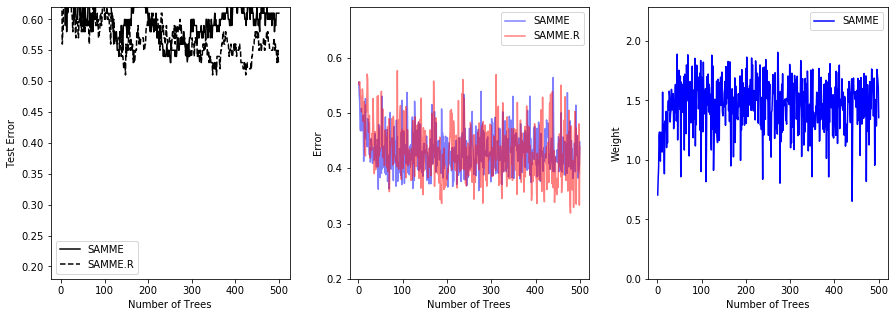

In [45]:
plot_train(bdt_discrete,bdt_real)

Confusion matrix, without normalization
[[10  8 12]
 [ 6 14 11]
 [ 9  7 23]]
Normalized confusion matrix
[[0.33333333 0.26666667 0.4       ]
 [0.19354839 0.4516129  0.35483871]
 [0.23076923 0.17948718 0.58974359]]


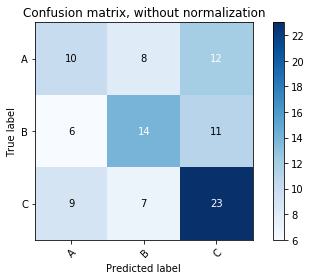

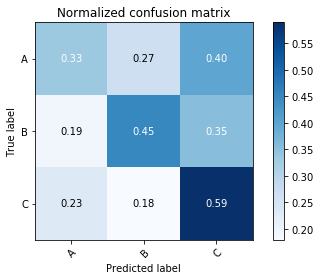

In [46]:
y_true = labels_test
y_pred = bdt_real.predict(data_test)
confusion_matrix(y_true, y_pred)
# Plot SAMME.R non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'],
                      title='Confusion matrix, without normalization')

# Plot SAMME.R normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[ 8 12 10]
 [ 9 10 12]
 [ 7 11 21]]
Normalized confusion matrix
[[0.26666667 0.4        0.33333333]
 [0.29032258 0.32258065 0.38709677]
 [0.17948718 0.28205128 0.53846154]]


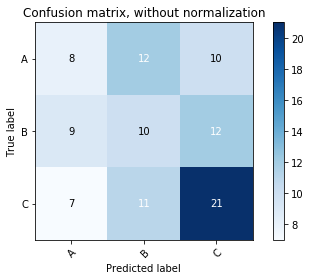

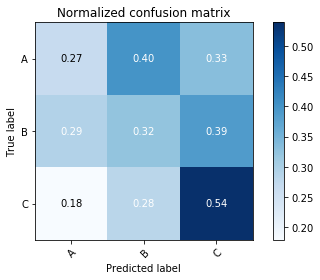

In [47]:
y_true = labels_test
y_pred = bdt_discrete.predict(data_test)
confusion_matrix(y_true, y_pred)
# Plot SAMME non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'],
                      title='Confusion matrix, without normalization')

# Plot SAMME normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()